In [411]:
import numpy as np
#import pylandau
from scipy.stats import moyal
from scipy.stats import norm
import uproot as up
from matplotlib import pyplot as plt
plt.style.use('tdrstyle.mplstyle')

In [412]:
def Q2Lepton(E, Theta, Elep, Ehad):
    return 2*E*Elep*(1+np.cos(Theta))

In [413]:
def YLepton(E, Theta, Elep, Ehad):
    return 1 - E/(2*Elep)*(1-np.cos(Theta))

In [414]:
def yFromQ2x(Q2,x, Elep, Ehad):
    s = 4.*Elep*Ehad
    return Q2/s/x

In [415]:
def Eta(Theta):
    return -np.log(np.tan(Theta/2))

In [416]:
def ThetaEta(eta):
    return 2.0*np.arctan(np.exp(-eta)) 

In [417]:
def ThetaScatt(Q2,x, Elep, Ehad):
    return 2.0*np.arctan(np.sqrt(4.0*Elep*Elep/Q2-Elep/x/Ehad))

In [418]:
def EScatt(Q2,x, Elep, Ehad):
    return Elep*(1.0-Q2/4.0/Elep*(1./x/Ehad - 1./Elep))

In [419]:
def X0(material):
    if material == "W" :
        return 0.003502591
    elif material == "Fe" :
        return 0.017576835
    elif material == "Cu" :
        return 0.0145
    elif material == "concrete" :
        return 0.115652174
    else :
        print('unknown material')
    return 1

In [420]:
def LengthX0(length,material):
    return length/X0(material)

In [421]:
LengthX0(6,"W")

1713.0175918341592

In [422]:
def MeanEnergyLossW(Ebeam):
    return 0.167*Ebeam + 15

In [423]:
def PeakEnergyLossW(Ebeam):
    return 0.103*Ebeam + 17

In [424]:
def MeanEnergyLoss(Ebeam,length,material):
    if material == "W" :
        return MeanEnergyLossW(Ebeam)*length/6.0
    else :
        return MeanEnergyLossW(Ebeam)*length/6.0*X0("W")/X0(material)

In [425]:
def PeakEnergyLoss(Ebeam,length,material):
    if material == "W" :
        return PeakEnergyLossW(Ebeam)*length/6.0
    else :
        return PeakEnergyLossW(Ebeam)*length/6.0*X0("W")/X0(material)
    return 1

In [426]:
PeakEnergyLoss(1000,6,"W")

120.0

In [427]:
def SigmaTheta(Ebeam,length,material):
    return 0.0136/Ebeam*np.sqrt(LengthX0(length,material))*(1.0+0.038*np.log(LengthX0(length,material)))

In [428]:
SigmaTheta(1000,6,"W")

0.0007221526766493236

In [429]:
Eta(ThetaScatt(20,1E-4,1000,275))

-6.002700975034012

In [430]:
EScatt(100,1E-4,1000,275)

90.93409090909077

In [431]:
yFromQ2x(100,1E-4,1000,275)

0.909090909090909

In [432]:
# define a Landau distribution
xmax = 25.0
xmin = -5
dx = 0.01
nx = (xmax-xmin)/dx
x_landau = np.arange(xmin, xmax, dx)

In [433]:
# Now Tungsten nozzle
MuonEinc = 1000
#MuonEinc = 1000
#ELossAvW = 180 # Use Geant4 value
#ELossAvW = 360 # Use Geant4 value
# assume everything scales with energy
ELossAvW = 180*MuonEinc/1000
PeakOffsetW = ELossAvW/2.875*1.6 # Adjust to roughly match Geant4
ScaleLossW = 3.*ELossAvW/24

In [434]:
# MC Trials
Ntrial = 10000

In [435]:
rv = moyal()
r = moyal.rvs(loc=PeakOffsetW, scale=1.5704*ScaleLossW, size=Ntrial)

In [436]:
Emuon = MuonEinc-r
#fit_i = 850
#fit_f = 950
fit_i = MuonEinc-150*MuonEinc/1000
fit_f = MuonEinc-50*MuonEinc/1000
fit = Emuon[(Emuon >= fit_i) & (Emuon <= fit_f)]
(mu, sigma) = norm.fit(fit)
coefficient = len(fit)/len(Emuon)

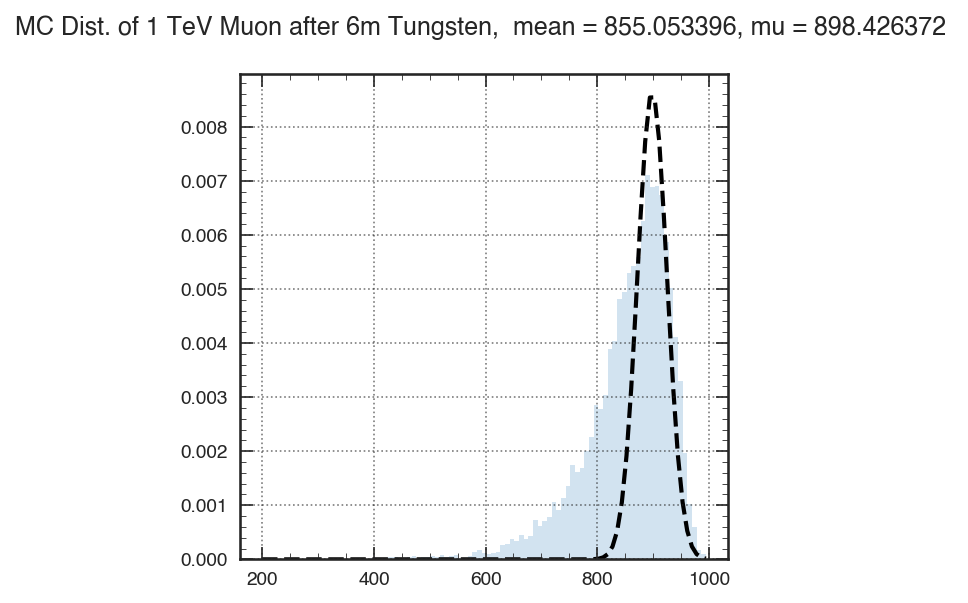

In [437]:
n, bins, patches = plt.hist(Emuon, density=True, bins='auto', histtype='stepfilled', alpha=0.2)
mids = 0.5*(bins[1:] + bins[:-1])
mean = np.average(mids, weights=n)
y = coefficient*norm.pdf( bins, mu, sigma)
l = plt.plot(bins, y, 'k--', linewidth = 2)
plt.title('MC Dist. of 1 TeV Muon after 6m Tungsten,  mean = %f, mu = %f \n' %(mean,mu), fontsize=12)
plt.show()
# let's choose peak of scattered energy as most probable value for determing most probable energy loss
Eloss1000 = MuonEinc - mu